In [2]:
import requests as req 
from bs4 import BeautifulSoup
import datetime
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

  (Country,Other,) (TotalCases,) (NewCases,) (TotalDeaths,) (NewDeaths,)  \
0           China         80,881        +21          3,226          +13    
1           Italy         27,980                     2,158                 
2            Iran         14,991                       853                 
3           Spain          9,942                       342                 
4        S. Korea          8,320        +84             81           +6    

  (TotalRecovered,) (ActiveCases,) (Serious,Critical,) (Tot Cases/1M pop,)  
0           68,688          8,967               3,226                 56.2  
1            2,749         23,073               1,851                       
2            4,996          9,142                                    178.5  
3              530          9,070                 272                212.6  
4            1,401          6,838                  59                162.3  


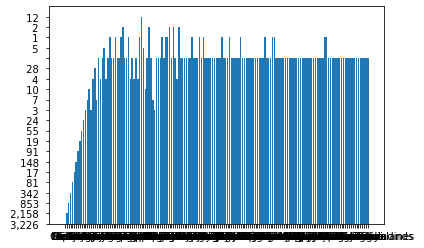

In [13]:
class CoronaAnalysis:
    def __init__(self):
        self._ActiveCases = {}
        self._ClosedCases = {}
        self._div_container = []
        self._countRespectives = []
        self._numberTables = []
        self._file = open("corono.txt", "a+")
        self._soup = ""
        response = req.get("https://www.worldometers.info/coronavirus/")
        self._soup = BeautifulSoup(response.text, "html.parser")
        
    def dataCapture(self):
        self._div_container = self._soup.findAll("div", {'class', 'panel panel-default'})
        self._countRespectives = self._soup.findAll("div", {"class", "number-table-main"})
        self._numberTables = self._soup.findAll("span", {"class", "number-table"})
    
    def activeCases(self):
        self.dataCapture()
        self._ActiveCases["Count"] = self._countRespectives[0].text
        self._ActiveCases["MildCondition"] = self._numberTables[0].text
        self._ActiveCases["SeriousCondition"] = self._numberTables[1].text
        print(self._ActiveCases)
    
    def closedCases(self):
        self.dataCapture()
        self._ClosedCases["Count"] = self._countRespectives[1].text
        self._ClosedCases["MildCondition"] = self._numberTables[2].text
        self._ClosedCases["SeriousCondition"] = self._numberTables[3].text            
    
    def storage(self):
        self.activeCases()
        self.closedCases()
        user_time = int(input("Enter time till which you want to monitor virus counts: "))
        for intervals in range(user_time * 2):
            time.sleep(30)
            temporal_store = ""
            temporal_store += "Active Cases: " + str(self._ActiveCases)  + "\n" + "ClosedCases: " + str(self._ClosedCases) + "\n\n"
            print(temporal_store)
            self._file.write(temporal_store)
        self._file.close()
        return True
    
    def dataAnalysis(self):
        feature_names = []
        tables = self._soup.findAll('table', {'class', 'table'})
        column_names = tables[0].findAll('th')
        for th in column_names:
            feature_names.append(th.text)
        feature_names = np.array([feature_names])
        table_bodies = tables[0].findAll('tbody')
        rows_data = table_bodies[0].findAll('tr')
        
        collective_rows = []
        for tr in rows_data:
            current_row = []
            for td in tr.findAll('td'):
                current_row.append(td.text)
            collective_rows.append(current_row)
        collective_rows = np.array(collective_rows)
        data = pd.DataFrame(collective_rows, columns=feature_names.reshape(-1, 1))
        plt.bar(data["Country,Other",], data["TotalDeaths",])
        print(data.head())
        
Object = CoronaAnalysis()
Object.dataAnalysis()